# Building Models

In [1]:
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler


## Postprocessing

Ideally I would import the postprocessing object and use that for analysis -- but snakemake takes way too long to compute the DAG. Here I will process it myself, but using the snakemake scripts.

In [2]:
import os 
os.chdir('/sietch_colab/akapoor/Demographic_Inference')

In [3]:
from snakemake_scripts.postprocessing import postprocessing

In [4]:
experiment_config = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
training_features = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/training_features.csv'
training_targets = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/training_targets.csv'
validation_features = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/validation_features.csv'
validation_targets = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/validation_targets.csv'

In [5]:
postprocessing_dict = postprocessing(experiment_config, training_features, training_targets, validation_features, validation_targets)


Processing training data:
===> Normalizing the data.

Processing validation data:
===> Normalizing the data.


In [6]:
# Save the postprocessing_dict
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/postprocessing_dict.pkl', 'wb') as f:
    pickle.dump(postprocessing_dict, f)

In [7]:
train_features = postprocessing_dict['training']['predictions']
train_targets = postprocessing_dict['training']['normalized_targets']
validation_features = postprocessing_dict['validation']['predictions']
validation_targets = postprocessing_dict['validation']['normalized_targets']

In [8]:
from snakemake_scripts.extracting_features import getting_the_features
postprocessing_dict_filepath = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/postprocessing_dict.pkl'
sim_directory = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2'

getting_the_features(postprocessing_dict_filepath, sim_directory)

dict_keys(['parameter_names', 'target_names', 'training', 'validation'])
Training features shape: (4000, 49)
Validation features shape: (1000, 49)
Training targets shape: (4000, 5)
Validation targets shape: (1000, 5)


## Model 0: MomentsLD features only

In [ ]:
experiment_directory = 'model0_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [ ]:
os.makedirs(experiment_directory, exist_ok=True)

First remove the log likelihood features and the FIM features

In [ ]:
train_features

In [ ]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl0 = train_features[
    train_features.columns[train_features.columns.str.contains('MomentsLD', case=False)]
]
validation_features_mdl0 = validation_features[
    validation_features.columns[validation_features.columns.str.contains('MomentsLD', case=False)]
]

In [ ]:
train_targets_mdl0 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl0 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [ ]:
train_features_mdl0

In [ ]:
import pickle
with open(f'/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [ ]:
features_and_targets['training']['features'] = train_features_mdl0.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl0.to_numpy()

In [ ]:
features_and_targets['training']['targets'] = train_targets_mdl0.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl0.to_numpy()

In [ ]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [ ]:
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'

In [ ]:
from snakemake_scripts.linear_evaluation import linear_evaluation

In [ ]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)

## Model 1: Moments, Dadi, MomentsLD features only

In [ ]:
experiment_directory = 'model1_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [ ]:
os.makedirs(experiment_directory, exist_ok=True)

First remove the log likelihood features and the FIM features

In [ ]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl1 = train_features[
    train_features.columns[~train_features.columns.str.contains(r'_m|FIM|ll', case=False, regex=True)]
]
validation_features_mdl1 = validation_features[
    validation_features.columns[~validation_features.columns.str.contains(r'_m|FIM|ll', case=False, regex=True)]
]


In [ ]:
train_targets_mdl1 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl1 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [ ]:
train_features_mdl1

In [ ]:
import pickle
with open(f'/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [ ]:
features_and_targets['training']['features'] = train_features_mdl1.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl1.to_numpy()

In [ ]:
features_and_targets['training']['targets'] = train_targets_mdl1.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl1.to_numpy()

In [ ]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [ ]:
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'

In [ ]:
from snakemake_scripts.linear_evaluation import linear_evaluation

In [ ]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)

## Model 2: Dadi, Moments, MomentsLD, FIM

In [9]:
experiment_directory = 'model2_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [10]:
os.makedirs(experiment_directory, exist_ok=True)

In [11]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl2 = train_features[
    train_features.columns[~train_features.columns.str.contains(r'_m|ll', case=False, regex=True)]
]
validation_features_mdl2 = validation_features[
    validation_features.columns[~validation_features.columns.str.contains(r'_m|ll', case=False, regex=True)]
]


In [12]:
train_targets_mdl2 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl2 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [13]:
train_features_mdl2

,Moments_rep1_Na,Moments_rep1_N1,Moments_rep1_N2,Moments_rep1_t_split,Moments_rep1_FIM_element_0,Moments_rep1_FIM_element_1,Moments_rep1_FIM_element_2,Moments_rep1_FIM_element_3,Moments_rep1_FIM_element_4,Moments_rep1_FIM_element_5,...,Dadi_rep1_N2,Dadi_rep1_t_split,Dadi_rep2_Na,Dadi_rep2_N1,Dadi_rep2_N2,Dadi_rep2_t_split,MomentsLD_N1,MomentsLD_N2,MomentsLD_t_split,MomentsLD_Na
Sim_0,18312.940893,1962.993363,8799.887484,2017.692859,-3.096293e+07,-2.350519e+05,3.268639e+07,-280032.273433,-560630.704182,3.095970e+06,...,5226.096672,1349.084944,18527.519346,2305.214366,4579.664504,1048.861969,3772.592111,6149.382967,1952.713335,18340.982292
Sim_1,17199.757558,3675.237517,7626.385955,1614.606744,-5.833645e+06,-4.010803e+05,2.463077e+07,0.000000,138131.809041,2.001481e+06,...,2249.617907,1269.686473,15405.515981,4025.421201,3932.098932,3189.450839,9670.775190,3809.999622,3034.968035,18475.007366
Sim_2,14424.877778,2037.055635,7626.385955,1167.047345,-3.580451e+07,-7.269977e+05,9.400295e+07,-112331.240567,-10019.316692,4.124115e+06,...,7874.060437,1968.364800,15405.515981,2324.022921,8218.992792,1609.952074,9106.083961,7921.145834,3879.015464,19964.370869
Sim_3,14037.174409,1351.364942,8194.071424,948.369102,-2.200687e+07,-2.195852e+05,4.775351e+07,-104314.546589,-233682.476412,2.697979e+06,...,9285.348559,1260.589153,13340.607449,2788.616759,6631.887628,1222.623864,1896.365453,6803.138211,1126.946015,14195.576973
Sim_4,11751.536265,2175.665686,6119.424600,1586.366195,-7.145964e+06,-1.014322e+05,8.393800e+06,-108700.122201,-240417.614830,1.540169e+06,...,2900.213899,1570.031725,12811.783893,1482.091042,2911.869288,714.133761,7364.649220,3765.812916,1651.710342,15005.820367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sim_3995,14246.808111,2457.608225,7626.385955,1691.199547,-9.138877e+06,-6.551062e+04,1.341683e+07,-122959.387681,-158670.738080,1.235138e+06,...,3353.713922,971.259473,14533.375402,1665.397782,9300.392127,715.574421,5702.130219,9196.466011,1874.630489,13671.773958
Sim_3996,15678.876016,1016.565518,7626.385955,797.525852,-8.573738e+07,-5.022361e+04,1.099910e+08,-265760.977638,-12111.017579,5.121398e+05,...,9029.333236,649.409939,14424.424877,4487.696668,4648.809970,2048.282272,2966.689740,5473.524548,941.981215,17148.553463
Sim_3997,12897.416422,2788.273579,7626.385955,1354.518860,-4.981668e+06,-1.559490e+05,1.502321e+07,-88335.000761,29053.258662,7.686408e+05,...,4115.242375,1820.489921,17778.358790,3849.067681,2362.399052,2521.918619,9848.646604,4299.149542,2877.147793,12649.602219
Sim_3998,12448.976931,1454.054429,6088.051289,1708.205831,-1.720310e+07,-3.362811e+05,1.692437e+07,0.000000,-204442.015009,1.724429e+06,...,2523.947585,2336.547004,12625.489605,2559.803095,1688.087105,641.991929,5172.524489,4746.217267,3615.260545,11317.675001


In [14]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [15]:
features_and_targets['training']['features'] = train_features_mdl2.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl2.to_numpy()

In [16]:
features_and_targets['training']['targets'] = train_targets_mdl2.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl2.to_numpy()

In [17]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [18]:
from snakemake_scripts.linear_evaluation import linear_evaluation

PREDICTIONS SHAPE TRAINING: (4000, 4)
[0.01481347 0.00842536 0.0498134  ... 0.0025249  0.00734131 0.31273189]
[1.03657093e-02 1.14778704e-02 3.95910386e-02 3.40434356e-02
 4.96067841e-01 1.06703779e-01 5.99591300e-02 1.50095280e-02
 5.54220611e-02 8.26789849e-03 4.02991463e-03 7.18777994e-02
 2.17883222e-02 8.16029052e-03 5.86414070e-02 2.16332480e-02
 1.97653049e-02 2.41751009e-02 2.88076400e-02 2.37985366e-02
 3.11043223e-03 7.47456121e-03 1.20375299e-02 2.53552398e-02
 4.45949480e-02 3.96934059e-01 4.51153741e-03 2.29430096e-02
 3.61439184e-02 1.87599594e-02 1.32044360e-01 8.17874610e-02
 7.28115540e-02 2.90323065e-02 1.36371090e-01 2.25682611e-03
 1.08014466e-02 1.43668564e-01 1.74133785e-02 3.47224472e-03
 4.70811180e-02 1.86790388e-02 1.44094729e-02 2.33011454e-02
 5.49499790e-02 3.15372299e-02 9.75044630e-03 1.60802011e-02
 1.64194049e-02 4.50237846e-01 1.52894301e-02 1.46335685e-02
 6.34060262e-01 7.45501099e-02 3.60447376e-02 5.12992088e-01
 1.07812889e-02 2.26825143e-02 1.108

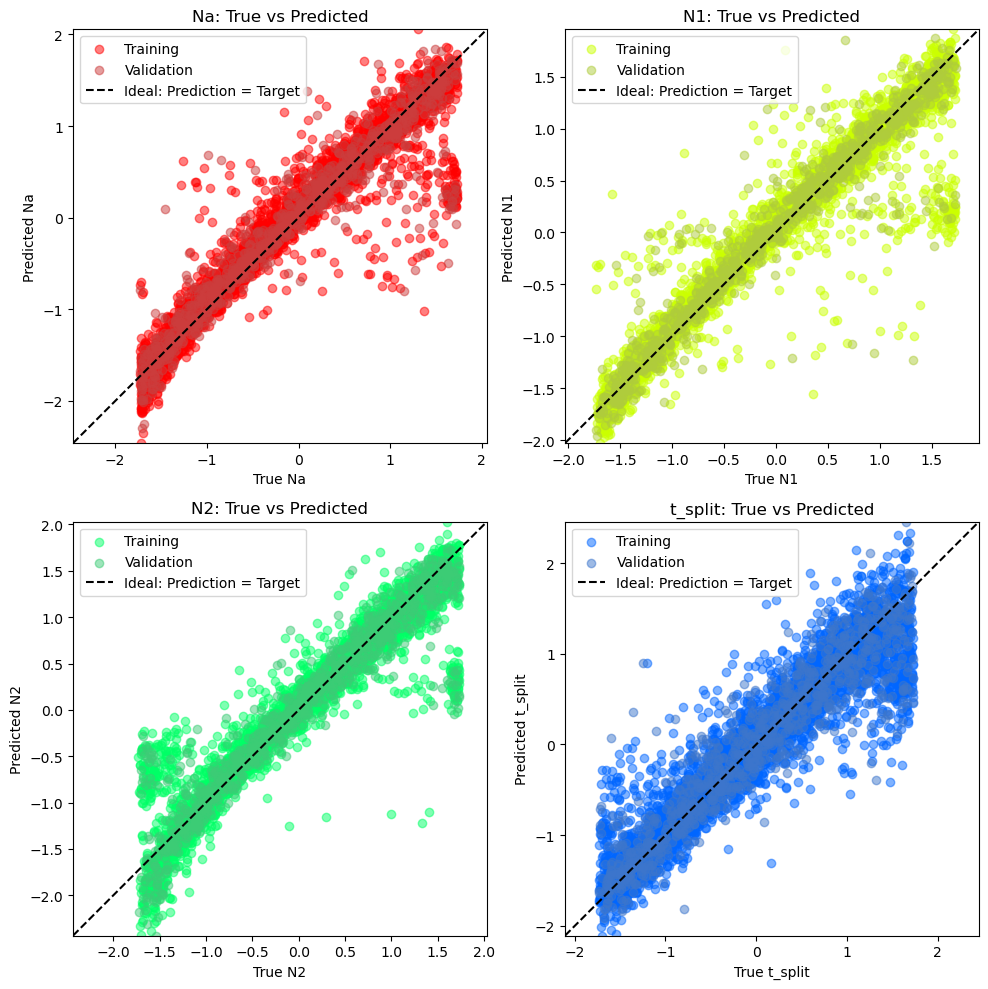

Linear model trained LFG


In [19]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)

Let's open the Linear model object and get the predictions

In [20]:
with open('/sietch_colab/akapoor/Demographic_Inference/model2_results/linear_mdl_obj.pkl', 'rb') as f:
    linear_mdl_obj = pickle.load(f)

In [23]:
def calculate_mse_df(dataset_type, linear_mdl_obj):
    """Calculate MSE and standard errors for a given dataset type (training or validation)"""
    params = linear_mdl_obj['param_names']
    mse_values = {}
    mse_errors = {}

    for i, param in enumerate(params):
        mse_values[param] = {}
        mse_errors[param] = {}
        target_values = linear_mdl_obj[dataset_type]['targets'][i]
        predictions = linear_mdl_obj[dataset_type]['predictions'][i]
        
        # Calculate MSE for each simulation
        squared_errors = (predictions - target_values) ** 2

        # Mean MSE across all simulations
        mse_values[param]['model2'] = np.mean(squared_errors)

        # Standard error of MSE across simulations
        mse_errors[param]['model2'] = np.std(squared_errors) / np.sqrt(len(squared_errors))

    # Create DataFrame
    result_df = pd.DataFrame({
        'Model2': [mse_values[p]['model2'] for p in params],
        'Model2_std_err': [mse_errors[p]['model2'] for p in params],
    }, index=params)
    
    return result_df

# Calculate MSE for both datasets
train_df = calculate_mse_df('training', linear_mdl_obj)
val_df = calculate_mse_df('validation', linear_mdl_obj)

print("Training MSE Values and Standard Errors:")
print(train_df)
print("\nValidation MSE Values and Standard Errors:")
print(val_df)


Training MSE Values and Standard Errors:
           Model2  Model2_std_err
Na       0.014813        0.009641
N1       0.008425        0.004305
N2       0.049813        0.038381
t_split  0.003485        0.001398

Validation MSE Values and Standard Errors:
           Model2  Model2_std_err
Na       0.010366        0.004936
N1       0.011478        0.005526
N2       0.039591        0.028196
t_split  0.034043        0.015178


Load in the the raw features MSE values for comparison (calculated in the probing_inference.ipynb)

In [24]:
import pandas as pd
momentsld_train = pd.read_csv('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/mean_values_preprocess_train.csv', index_col = 0)
momentsld_validation = pd.read_csv('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/mean_values_preprocess_validation.csv', index_col = 0)

In [25]:
# Using str.contains()
momentsLD_train = momentsld_train.loc[:, momentsld_train.columns.str.contains('MomentsLD')]
momentsLD_validation = momentsld_validation.loc[:, momentsld_validation.columns.str.contains('MomentsLD')]


In [26]:
# Merge dataframes horizontally
result_df1_train = pd.concat([momentsLD_train, train_df], axis=1)
result_df1_validation = pd.concat([momentsLD_validation, val_df], axis=1)

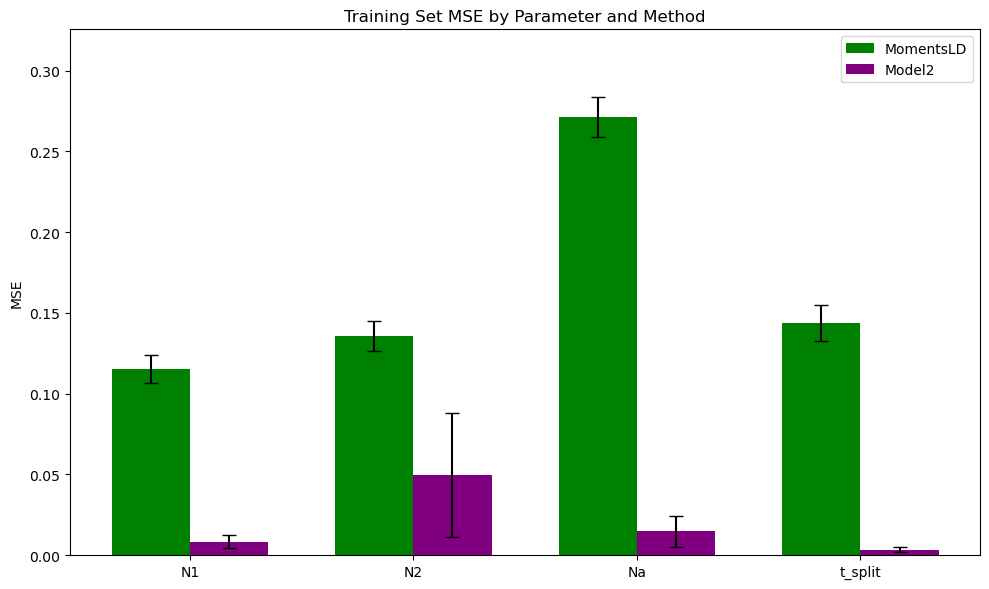

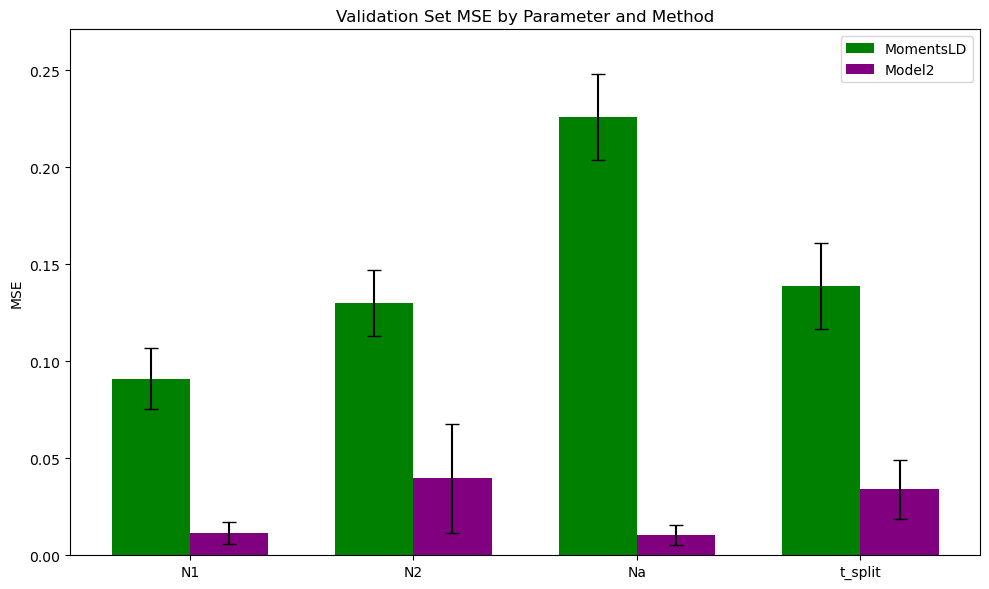

In [28]:
import matplotlib.pyplot as plt
def plot_comparison_barplot(result_df, title='MSE by Parameter and Method'):
   """
   Create grouped bar plot comparing MomentsLD and Model3 MSE values
   
   Parameters:
   -----------
   result_df : pandas DataFrame
       DataFrame containing MomentsLD, MomentsLD_std_err, Model3, and Model3_std_err columns
   title : str
       Title for the plot
   
   Returns:
   --------
   fig : matplotlib figure object
   """
   # Get parameter names (indices of DataFrame)
   params = result_df.index
   
   # Create grouped bar plot
   x = np.arange(len(params))
   width = 0.35  # Made slightly wider for better visibility

   fig, ax = plt.subplots(figsize=(10, 6))

   # Create bars with error bars
   rects1 = ax.bar(x - width/2, result_df['MomentsLD'], width,
                   yerr=result_df['MomentsLD_std_err'],
                   label='MomentsLD', capsize=5, color='green')
   rects2 = ax.bar(x + width/2, result_df['Model2'], width,
                   yerr=result_df['Model2_std_err'],
                   label='Model2', capsize=5, color='purple')

   ax.set_ylabel('MSE')
   ax.set_title(title)
   ax.set_xticks(x)
   ax.set_xticklabels(params)
   ax.legend()

   # Add some padding to the top of the plot to show error bars fully
   ax.set_ylim(0, max(result_df['MomentsLD'].max(), result_df['Model2'].max()) * 1.2)

   plt.tight_layout()
   
   return fig

# Usage example:
fig = plot_comparison_barplot(result_df1_train, "Training Set MSE by Parameter and Method")
plt.show()

fig = plot_comparison_barplot(result_df1_validation, "Validation Set MSE by Parameter and Method")
plt.show()

### Model 3.2: Lasso Regression using the actual SFS

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# Now let's implement Lasso Regression
# alpha is the regularization strength - higher values mean stronger regularization
lasso = Lasso(alpha=0.1, random_state=42)

# Fit the model and make predictions
lasso.fit(train_features_mdl3, train_targets_mdl3)
lasso_predictions = lasso.predict(validation_features_mdl3)



In [ ]:
linear_mdl_obj = {}
linear_mdl_obj['training'] = {}
linear_mdl_obj['validation'] = {}

linear_mdl_obj['training']['predictions'] = lasso.predict(train_features_mdl3)
linear_mdl_obj['training']['targets'] = train_targets_mdl3

linear_mdl_obj['validation']['predictions'] = lasso_predictions
linear_mdl_obj['validation']['targets'] = validation_targets_mdl3
linear_mdl_obj['param_names'] = train_targets_mdl3.columns

In [ ]:
from src.utils import mean_squared_error

In [ ]:
rrmse_dict = {}
rrmse_dict["training"] = mean_squared_error(
    y_true=linear_mdl_obj["training"]["targets"], y_pred=linear_mdl_obj['training']['predictions']
)
rrmse_dict["validation"] = mean_squared_error(
    y_true=linear_mdl_obj["validation"]["targets"], y_pred=lasso_predictions
)


In [ ]:
rrmse_dict

## Model 3

In [ ]:
experiment_directory = 'model3.1_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [ ]:
os.makedirs(experiment_directory, exist_ok=True)

In [ ]:
train_features

I want to get the row simulation numbers so I can append the SFS to each row. To do this, load the preprocessing object which has the indices saved.

In [ ]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/preprocessing_results_obj.pkl', 'rb') as f:
    preprocessing_results = pickle.load(f)

In [ ]:
train_indices = preprocessing_results['training']['indices']
validation_indices = preprocessing_results['validation']['indices']

In [ ]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl3 = train_features[
    train_features.columns[~train_features.columns.str.contains(r'_m|ll', case=False, regex=True)]
]
validation_features_mdl3 = validation_features[
    validation_features.columns[~validation_features.columns.str.contains(r'_m|ll', case=False, regex=True)]
]


In [ ]:
train_features_mdl3

In [ ]:
# Initialize a list to store flattened SFS data
flattened_SFS_data = []

# Process each index in train_indices
for idx in tqdm(train_indices, desc="Processing SFS data"):
    file_path = os.path.join('/sietch_colab/akapoor/Demographic_Inference/moments_dadi_features', f"software_inferences_sim_{idx}.pkl")
    
    # Load the data from the file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)

    selected_SFS = data['sfs']
    
    # # Find the index of the maximum log-likelihood in 'll_all_replicates_dadi'
    # max_ll_index = np.argmax(data['ll_all_replicates_dadi'])
    
    # # Extract the corresponding SFS
    # selected_SFS = data['model_sfs_dadi'][max_ll_index]
    
    # Flatten the SFS and append to the list
    flattened_SFS = np.array(selected_SFS.flatten())
    flattened_SFS_data.append(flattened_SFS)

# Convert the flattened SFS data to a DataFrame
sfs_features_df = pd.DataFrame(flattened_SFS_data)

# Rename columns to SFS_feature_0, SFS_feature_1, ..., SFS_feature_N
sfs_features_df.columns = [f"SFS_feature_{i}" for i in range(sfs_features_df.shape[1])]

# Select all columns except first and last
# sfs_features_df = sfs_features_df.iloc[:, 1:-1]

scaler = StandardScaler()
sfs_features_scaled_df = pd.DataFrame(
    scaler.fit_transform(sfs_features_df),  # Transform the data
    columns=sfs_features_df.columns,        # Keep the column names
    index=sfs_features_df.index            # Keep the index
)

# Append the new SFS columns to `train_features_mdl3` as new columns
# No merging by indices, just appending directly
train_features_mdl3 = pd.concat([train_features_mdl3.reset_index(drop=True), sfs_features_scaled_df.reset_index(drop=True)], axis=1)


In [ ]:
# Initialize a list to store flattened SFS data
flattened_SFS_data = []

# Process each index in train_indices
for idx in tqdm(validation_indices, desc="Processing SFS data"):
    file_path = os.path.join('/sietch_colab/akapoor/Demographic_Inference/moments_dadi_features', f"software_inferences_sim_{idx}.pkl")
    
    # Load the data from the file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # # Find the index of the maximum log-likelihood in 'll_all_replicates_dadi'
    # max_ll_index = np.argmax(data['ll_all_replicates_dadi'])
    
    # # Extract the corresponding SFS
    # selected_SFS = data['model_sfs_dadi'][max_ll_index]

    selected_SFS = data['sfs']
    
    # Flatten the SFS and append to the list
    flattened_SFS = np.array(selected_SFS.flatten())
    flattened_SFS_data.append(flattened_SFS)

# Convert the flattened SFS data to a DataFrame
sfs_features_df = pd.DataFrame(flattened_SFS_data)

# Rename columns to SFS_feature_0, SFS_feature_1, ..., SFS_feature_N
sfs_features_df.columns = [f"SFS_feature_{i}" for i in range(sfs_features_df.shape[1])]

# Select all columns except first and last
# sfs_features_df = sfs_features_df.iloc[:, 1:-1]

scaler = StandardScaler()
sfs_features_df = pd.DataFrame(
    scaler.fit_transform(sfs_features_df),  # Transform the data
    columns=sfs_features_df.columns,        # Keep the column names
    index=sfs_features_df.index            # Keep the index
)

# Append the new SFS columns to `train_features_mdl3` as new columns
# No merging by indices, just appending directly
validation_features_mdl3 = pd.concat([validation_features_mdl3.reset_index(drop=True), sfs_features_df.reset_index(drop=True)], axis=1)


In [ ]:
train_targets_mdl3 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl3 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [ ]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [ ]:
features_and_targets['training']['features'] = train_features_mdl3.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl3.to_numpy()

In [ ]:
features_and_targets['training']['targets'] = train_targets_mdl3.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl3.to_numpy()

In [ ]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [ ]:
from snakemake_scripts.linear_evaluation import linear_evaluation

In [ ]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)

In [ ]:
experiment_directory

Let's open the Linear model object and get the predictions

In [ ]:
with open('/sietch_colab/akapoor/Demographic_Inference/model3_results/linear_mdl_obj.pkl', 'rb') as f:
    linear_mdl_obj = pickle.load(f)

In [ ]:
linear_mdl_obj.keys()

In [ ]:
linear_mdl_obj['param_names']

In [ ]:
linear_mdl_obj['training']

In [ ]:
def calculate_mse_df(dataset_type, linear_mdl_obj):
    """Calculate MSE and standard errors for a given dataset type (training or validation)"""
    params = linear_mdl_obj['param_names']
    mse_values = {}
    mse_errors = {}

    for i, param in enumerate(params):
        mse_values[param] = {}
        mse_errors[param] = {}
        target_values = linear_mdl_obj[dataset_type]['targets'][i]
        predictions = linear_mdl_obj[dataset_type]['predictions'][i]
        
        # Calculate MSE for each simulation
        squared_errors = (predictions - target_values) ** 2

        # Mean MSE across all simulations
        mse_values[param]['model3'] = np.mean(squared_errors)

        # Standard error of MSE across simulations
        mse_errors[param]['model3'] = np.std(squared_errors) / np.sqrt(len(squared_errors))

    # Create DataFrame
    result_df = pd.DataFrame({
        'Model3': [mse_values[p]['model3'] for p in params],
        'Model3_std_err': [mse_errors[p]['model3'] for p in params],
    }, index=params)
    
    return result_df

# Calculate MSE for both datasets
train_df = calculate_mse_df('training', linear_mdl_obj)
val_df = calculate_mse_df('validation', linear_mdl_obj)

print("Training MSE Values and Standard Errors:")
print(train_df)
print("\nValidation MSE Values and Standard Errors:")
print(val_df)


Load in the the raw features MSE values for comparison (calculated in the probing_inference.ipynb)

In [ ]:
import pandas as pd
momentsld_train = pd.read_csv('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/mean_values_preprocess_train.csv', index_col = 0)
momentsld_validation = pd.read_csv('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/mean_values_preprocess_validation.csv', index_col = 0)

In [ ]:
# Using str.contains()
momentsLD_train = momentsld_train.loc[:, momentsld_train.columns.str.contains('MomentsLD')]
momentsLD_validation = momentsld_validation.loc[:, momentsld_validation.columns.str.contains('MomentsLD')]


In [ ]:
# Merge dataframes horizontally
result_df1_train = pd.concat([momentsLD_train, train_df], axis=1)
result_df1_validation = pd.concat([momentsLD_validation, val_df], axis=1)

In [ ]:
import matplotlib.pyplot as plt
def plot_comparison_barplot(result_df, title='MSE by Parameter and Method'):
   """
   Create grouped bar plot comparing MomentsLD and Model3 MSE values
   
   Parameters:
   -----------
   result_df : pandas DataFrame
       DataFrame containing MomentsLD, MomentsLD_std_err, Model3, and Model3_std_err columns
   title : str
       Title for the plot
   
   Returns:
   --------
   fig : matplotlib figure object
   """
   # Get parameter names (indices of DataFrame)
   params = result_df.index
   
   # Create grouped bar plot
   x = np.arange(len(params))
   width = 0.35  # Made slightly wider for better visibility

   fig, ax = plt.subplots(figsize=(10, 6))

   # Create bars with error bars
   rects1 = ax.bar(x - width/2, result_df['MomentsLD'], width,
                   yerr=result_df['MomentsLD_std_err'],
                   label='MomentsLD', capsize=5, color='green')
   rects2 = ax.bar(x + width/2, result_df['Model3'], width,
                   yerr=result_df['Model3_std_err'],
                   label='Model3', capsize=5, color='purple')

   ax.set_ylabel('MSE')
   ax.set_title(title)
   ax.set_xticks(x)
   ax.set_xticklabels(params)
   ax.legend()

   # Add some padding to the top of the plot to show error bars fully
   ax.set_ylim(0, max(result_df['MomentsLD'].max(), result_df['Model3'].max()) * 1.2)

   plt.tight_layout()
   
   return fig

# Usage example:
fig = plot_comparison_barplot(result_df1_train, "Training Set MSE by Parameter and Method")
plt.show()

fig = plot_comparison_barplot(result_df1_validation, "Validation Set MSE by Parameter and Method")
plt.show()

### Model 3.2: Lasso Regression using the actual SFS

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# Now let's implement Lasso Regression
# alpha is the regularization strength - higher values mean stronger regularization
lasso = Lasso(alpha=0.1, random_state=42)

# Fit the model and make predictions
lasso.fit(train_features_mdl3, train_targets_mdl3)
lasso_predictions = lasso.predict(validation_features_mdl3)



In [ ]:
linear_mdl_obj = {}
linear_mdl_obj['training'] = {}
linear_mdl_obj['validation'] = {}

linear_mdl_obj['training']['predictions'] = lasso.predict(train_features_mdl3)
linear_mdl_obj['training']['targets'] = train_targets_mdl3

linear_mdl_obj['validation']['predictions'] = lasso_predictions
linear_mdl_obj['validation']['targets'] = validation_targets_mdl3
linear_mdl_obj['param_names'] = train_targets_mdl3.columns

In [ ]:
from src.utils import mean_squared_error

In [ ]:
rrmse_dict = {}
rrmse_dict["training"] = mean_squared_error(
    y_true=linear_mdl_obj["training"]["targets"], y_pred=linear_mdl_obj['training']['predictions']
)
rrmse_dict["validation"] = mean_squared_error(
    y_true=linear_mdl_obj["validation"]["targets"], y_pred=lasso_predictions
)


In [ ]:
rrmse_dict

### Model 3.3: Elastic Net Regression using the actual SFS

In [ ]:
from sklearn.linear_model import ElasticNet

# Now let's implement Lasso Regression
# alpha is the regularization strength - higher values mean stronger regularization
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Fit the model and make predictions
elastic_net.fit(train_features_mdl3, train_targets_mdl3)
elastic_net_predictions = elastic_net.predict(validation_features_mdl3)



In [ ]:
linear_mdl_obj = {}
linear_mdl_obj['training'] = {}
linear_mdl_obj['validation'] = {}

linear_mdl_obj['training']['predictions'] = elastic_net.predict(train_features_mdl3)
linear_mdl_obj['training']['targets'] = train_targets_mdl3

linear_mdl_obj['validation']['predictions'] = elastic_net_predictions
linear_mdl_obj['validation']['targets'] = validation_targets_mdl3
linear_mdl_obj['param_names'] = train_targets_mdl3.columns

In [ ]:
from src.utils import mean_squared_error

In [ ]:
rrmse_dict = {}
rrmse_dict["training"] = mean_squared_error(
    y_true=linear_mdl_obj["training"]["targets"], y_pred=linear_mdl_obj['training']['predictions']
)
rrmse_dict["validation"] = mean_squared_error(
    y_true=linear_mdl_obj["validation"]["targets"], y_pred=elastic_net_predictions
)


In [ ]:
rrmse_dict

## Model 4

In [ ]:
experiment_directory = 'model4.1_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [ ]:
os.makedirs(experiment_directory, exist_ok=True)

In [ ]:
train_features

I want to get the row simulation numbers so I can append the SFS to each row. To do this, load the preprocessing object which has the indices saved.

In [ ]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/preprocessing_results_obj.pkl', 'rb') as f:
    preprocessing_results = pickle.load(f)

In [ ]:
train_indices = preprocessing_results['training']['indices']
validation_indices = preprocessing_results['validation']['indices']

In [ ]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl4 = train_features[
    train_features.columns[~train_features.columns.str.contains(r'_m|FIM|ll', case=False, regex=True)]
]
validation_features_mdl4 = validation_features[
    validation_features.columns[~validation_features.columns.str.contains(r'_m|FIM|ll', case=False, regex=True)]
]


In [ ]:
train_features_mdl4

In [ ]:
# Initialize a list to store flattened SFS data
flattened_SFS_data = []

# Process each index in train_indices
for idx in tqdm(train_indices, desc="Processing SFS data"):
    file_path = os.path.join('/sietch_colab/akapoor/Demographic_Inference/moments_dadi_features', f"software_inferences_sim_{idx}.pkl")
    
    # Load the data from the file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Find the index of the maximum log-likelihood in 'll_all_replicates_dadi'
    # max_ll_index = np.argmax(data['ll_all_replicates_dadi'])
    
    # # Extract the corresponding SFS
    # selected_SFS = data['model_sfs_dadi'][max_ll_index]

    selected_SFS = data['sfs']
    
    # Flatten the SFS and append to the list
    flattened_SFS = np.array(selected_SFS.flatten())
    flattened_SFS_data.append(flattened_SFS)

# Convert the flattened SFS data to a DataFrame
sfs_features_df = pd.DataFrame(flattened_SFS_data)

# Rename columns to SFS_feature_0, SFS_feature_1, ..., SFS_feature_N
sfs_features_df.columns = [f"SFS_feature_{i}" for i in range(sfs_features_df.shape[1])]

# Append the new SFS columns to `train_features_mdl3` as new columns
# No merging by indices, just appending directly
train_features_mdl4 = pd.concat([train_features_mdl4.reset_index(drop=True), sfs_features_df.reset_index(drop=True)], axis=1)


In [ ]:
train_features_mdl4.shape

In [ ]:
# Initialize a list to store flattened SFS data
flattened_SFS_data = []

# Process each index in train_indices
for idx in tqdm(validation_indices, desc="Processing SFS data"):
    file_path = os.path.join('/sietch_colab/akapoor/Demographic_Inference/moments_dadi_features', f"software_inferences_sim_{idx}.pkl")
    
    # Load the data from the file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Find the index of the maximum log-likelihood in 'll_all_replicates_dadi'
    # max_ll_index = np.argmax(data['ll_all_replicates_dadi'])
    
    # # Extract the corresponding SFS
    # selected_SFS = data['model_sfs_dadi'][max_ll_index]

    selected_SFS = data['sfs']
    
    # Flatten the SFS and append to the list
    flattened_SFS = np.array(selected_SFS.flatten())
    flattened_SFS_data.append(flattened_SFS)

# Convert the flattened SFS data to a DataFrame
sfs_features_df = pd.DataFrame(flattened_SFS_data)

# Rename columns to SFS_feature_0, SFS_feature_1, ..., SFS_feature_N
sfs_features_df.columns = [f"SFS_feature_{i}" for i in range(sfs_features_df.shape[1])]

# Append the new SFS columns to `train_features_mdl3` as new columns
# No merging by indices, just appending directly
validation_features_mdl4 = pd.concat([validation_features_mdl4.reset_index(drop=True), sfs_features_df.reset_index(drop=True)], axis=1)


In [ ]:
train_targets_mdl4 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl4 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [ ]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [ ]:
features_and_targets['training']['features'] = train_features_mdl4.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl4.to_numpy()

In [ ]:
features_and_targets['training']['targets'] = train_targets_mdl4.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl4.to_numpy()

In [ ]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [ ]:
from snakemake_scripts.linear_evaluation import linear_evaluation

In [ ]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)